## Import Libraries

In [8]:
import networkx as nx
import re
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import normalize

## Part1:

In [9]:
G = nx.DiGraph()

# make graph 
with open('friendship-data.txt') as fp:
    #read every line
    for line in fp:
        # create a list from each line with possible numbers! 
        l = [int(f) for f in re.split(',|\s',line) if f.isdigit()]
        # set first number of list as source and others as destination
        if len(l[1:])==0:
            G.add_node(l[0])
        else:
            for e in l[1:]:
                G.add_edge(l[0], e)

In [10]:
print(f" number of edges:{G.number_of_edges()}, number of nodes:{G.number_of_nodes()}")

 number of edges:661596, number of nodes:49995


## Part2:

(array([9378., 7458., 8392., 4192., 4592., 2296., 2733., 1381., 1673.,
         924., 1126.,  577.,  717.,  420.,  534.,  317.,  347.,  210.,
         268.,  189.,  237.,  150.,  178.,  108.,  133.,   68.,  107.,
          65.,   77.,   56.,   81.,   43.,   65.,   40.,   44.,   34.,
          42.,   27.,   39.,  677.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 40 artists>)

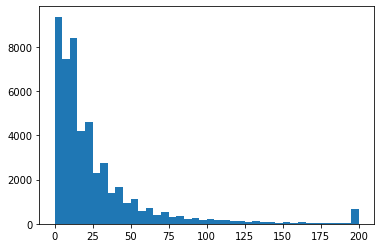

In [11]:
degree_sequence = sorted(map(lambda v: v[1], nx.degree(G)), reverse=True) 
plt.hist(degree_sequence, bins=40)

In [12]:
# average degree of nodes
np.mean(degree_sequence)

26.466486648664866

## Part3

In [13]:
pr = nx.pagerank(G, alpha=1)

In [14]:
for key in sorted(pr, key=lambda k: pr[k] , reverse=True)[:10]:
    print(key, pr[key])

46039 0.0002241990109636849
26853 0.00020934307579999347
20283 0.00020841686643162974
45870 0.0002047247204412644
25537 0.00020431734453571363
13426 0.00020384352288221216
7884 0.00020337926759949736
7458 0.0002025808432659021
3134 0.00020186277943520873
24966 0.00019859242123662003


## Part 4 (all pathes printed with max length among shortest pathes from 9842)

In [15]:
path = nx.single_source_shortest_path(G, 8942)

In [16]:
max_length = 0 
for i in range(0, len(path)):
    try:
        max_length = max(len(path[i]), max_length)
    except:
        pass

In [17]:
for i in range(0, len(path)):
    try:
        if len(path[i]) == max_length:
            print(path[i])
    except:
        pass

[8942, 8938, 8944, 13306, 22606, 1110, 1930, 1929, 1932, 1315, 1316]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16753]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16754]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16755]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16757]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16758]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16759]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16760]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16761]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16762]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16764]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16766]
[8942, 8938, 8944, 13306, 13430, 24446, 16470, 17699, 16778, 16752, 16767]
[8942, 8938, 8944, 13306, 13430

## Part 5: (algorithm with this parameters explained in Question5)/

In [45]:
def page_rank(G, alpha, teleport_indices=None, threshold=1e-12, max_iter = 1000):
    M = nx.to_scipy_sparse_matrix(G)
    n = M.shape[0]
    v = np.ones(n)/n

    teleport_set_penalty = np.zeros(n)
    
    if teleport_indices is None:              
        teleport_set_penalty = (1 - alpha) * np.ones(n)/n
    else:
        teleport_set_penalty[teleport_indices] = (1 - alpha) * 1/len(teleport_indices)

    M = normalize(M, norm='l1', axis=1)
    v2 = np.zeros(n) 

    count = 0 
    while np.linalg.norm(v - v2) >= threshold:
        if (count> max_iter):
            break
        v2 = v
        v = alpha * M.T.dot(v2) + teleport_set_penalty
        count +=1
    return v

In [23]:
t_set = [i for i in G if G.out_degree(i) > 20]
x = page_rank(G, 0.9, teleport_indices=t_set, threshold=1e-12, max_iter= 100)

In [51]:
print(f"page rank node 10000 in matrix with start by index 0: {x[10000]}")

page rank node 10000 in matrix with start by index 0: 2.962566215696646e-05


## Question 5

In [42]:
matrix_q5 = np.array([
    [1,0,0,1,1,1], 
    [0,1,0,1,1,1],
    [0,0,1,1,1,1],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1]])

In [43]:
G_q5 = nx.from_numpy_matrix(matrix_q5, create_using=nx.DiGraph())

### Tax 0

In [48]:
list(page_rank(G_q5, 1, threshold=1e-12, max_iter= 100))

[3.789561257387201e-14,
 3.789561257387201e-14,
 3.789561257387201e-14,
 0.3333333333332954,
 0.3333333333332954,
 0.3333333333332954]

### Tax = 0.5

In [49]:
list(page_rank(G_q5, 0.5, threshold=1e-12, max_iter= 100))

[0.09523809523811147,
 0.09523809523811147,
 0.09523809523811147,
 0.23809523809522182,
 0.23809523809522182,
 0.23809523809522182]